# Problem Statement

Data Source - http://www.stat.ufl.edu/~winner/datasets.html 

Data Set - http://www.stat.ufl.edu/~winner/data/airq402.dat 

Data Description - http://www.stat.ufl.edu/~winner/data/airq402.txt 

Dataset:   airq402.dat 

Source: U.S. Department of Transportation 

Description: Airfares and passengers for U.S. Domestic Routes for 4th Quarter of 2002. 

Variables/Columns 

City1  1-3 
City2  5-7 
Average Fare    11-17 
Distance     20-23 
Average weekly passengers     26-33 
market leading airline    36-37 
market share     40-45 
Average fare    48-54 
Low price airline   57-58 
market share     61-66 
price    69-75 

In [171]:
# Importing the Packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn import cross_validation as cv
from scipy import linalg
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# loading the Dataset

In [172]:
df = pd.read_csv('winner.csv')
df.head()

,City1,City2,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_fare_1,Low_price_airline,market_share_1,price,Average_Fare
0,CAK,ATL,528.0,424.56,FL,70.19,111.03,FL,70.19,111.03,114.47
1,CAK,MCO,860.0,276.84,FL,75.10,123.09,DL,17.23,118.94,122.47
2,ALB,ATL,852.0,215.76,DL,78.89,223.98,CO,2.77,167.12,214.42
3,ALB,BWI,288.0,606.84,WN,96.97,68.86,WN,96.97,68.86,69.40
4,ALB,ORD,723.0,313.04,UA,39.79,161.36,WN,15.34,145.42,158.13


In [173]:
data = df.drop(['Average_fare_1'], axis = 1)
data.head()

,City1,City2,Distance,Average_weekly_passengers,market_leading_airline,market_share,Low_price_airline,market_share_1,price,Average_Fare
0,CAK,ATL,528.0,424.56,FL,70.19,FL,70.19,111.03,114.47
1,CAK,MCO,860.0,276.84,FL,75.10,DL,17.23,118.94,122.47
2,ALB,ATL,852.0,215.76,DL,78.89,CO,2.77,167.12,214.42
3,ALB,BWI,288.0,606.84,WN,96.97,WN,96.97,68.86,69.40
4,ALB,ORD,723.0,313.04,UA,39.79,WN,15.34,145.42,158.13


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
City1                        1001 non-null object
City2                        1000 non-null object
Distance                     1000 non-null float64
Average_weekly_passengers    1000 non-null float64
market_leading_airline       1000 non-null object
market_share                 1000 non-null float64
Low_price_airline            1000 non-null object
market_share_1               1000 non-null float64
price                        1000 non-null float64
Average_Fare                 1000 non-null float64
dtypes: float64(6), object(4)
memory usage: 78.3+ KB


In [175]:
data.describe()

,Distance,Average_weekly_passengers,market_share,market_share_1,price,Average_Fare
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1056.973000,672.279140,60.128590,34.551480,143.193090,163.37542
std,643.203251,766.519254,19.367779,27.096999,47.229184,55.36547
min,108.000000,181.410000,17.680000,1.060000,49.610000,50.52000
25%,553.500000,257.197500,46.510000,13.195000,113.767500,125.97500
50%,919.000000,404.780000,59.240000,26.140000,137.825000,161.34500
75%,1452.500000,769.912500,73.510000,52.972500,168.530000,197.39250
max,2724.000000,8950.760000,100.000000,100.000000,387.940000,401.23000


In [176]:
data.describe(include= ['O'])

,City1,City2,market_leading_airline,Low_price_airline
count,1001,1000,1000,1000
unique,91,85,16,19
top,ATL,TPA,WN,WN
freq,64,46,257,230


In [177]:
# Checking for missing values
data.isnull().sum()

City1                        0
City2                        1
Distance                     1
Average_weekly_passengers    1
market_leading_airline       1
market_share                 1
Low_price_airline            1
market_share_1               1
price                        1
Average_Fare                 1
dtype: int64

In [178]:
# Dropping the missing values as there are very less values
data=data.dropna()

In [179]:
data.isnull().sum()

City1                        0
City2                        0
Distance                     0
Average_weekly_passengers    0
market_leading_airline       0
market_share                 0
Low_price_airline            0
market_share_1               0
price                        0
Average_Fare                 0
dtype: int64

# Exploratory Data Analysis

C:\Users\Satish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


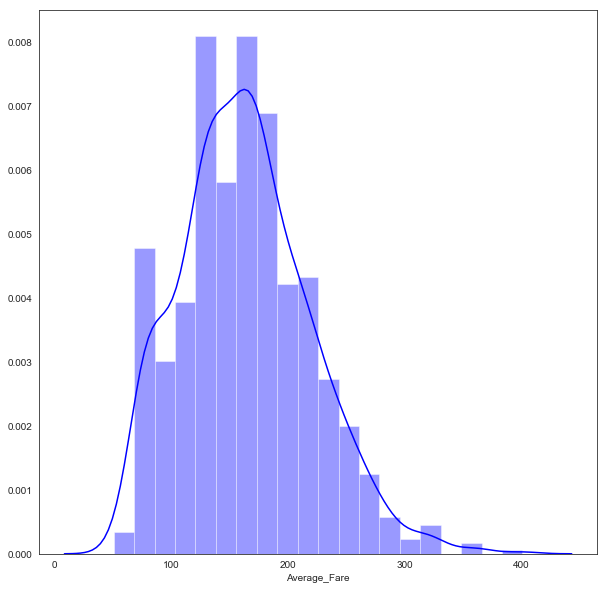

In [180]:
plt.figure(figsize=(10, 10))
sns.distplot(data['Average_Fare'], color='b', bins=20, hist_kws={'alpha': 0.4});

In [181]:
# From above plot,there are outliers after 350 and left skewed.

In [182]:
# Finding the numerical coumns and object columns in train dataset
data.count(numeric_only=True).count()

6

In [183]:
data.head()

,City1,City2,Distance,Average_weekly_passengers,market_leading_airline,market_share,Low_price_airline,market_share_1,price,Average_Fare
0,CAK,ATL,528.0,424.56,FL,70.19,FL,70.19,111.03,114.47
1,CAK,MCO,860.0,276.84,FL,75.10,DL,17.23,118.94,122.47
2,ALB,ATL,852.0,215.76,DL,78.89,CO,2.77,167.12,214.42
3,ALB,BWI,288.0,606.84,WN,96.97,WN,96.97,68.86,69.40
4,ALB,ORD,723.0,313.04,UA,39.79,WN,15.34,145.42,158.13


In [184]:
data_numerical = data.select_dtypes(include = ['float64', 'int64'])
data_numerical.head()

,Distance,Average_weekly_passengers,market_share,market_share_1,price,Average_Fare
0,528.0,424.56,70.19,70.19,111.03,114.47
1,860.0,276.84,75.10,17.23,118.94,122.47
2,852.0,215.76,78.89,2.77,167.12,214.42
3,288.0,606.84,96.97,96.97,68.86,69.40
4,723.0,313.04,39.79,15.34,145.42,158.13


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F6BCC88>,
      dtype=object)

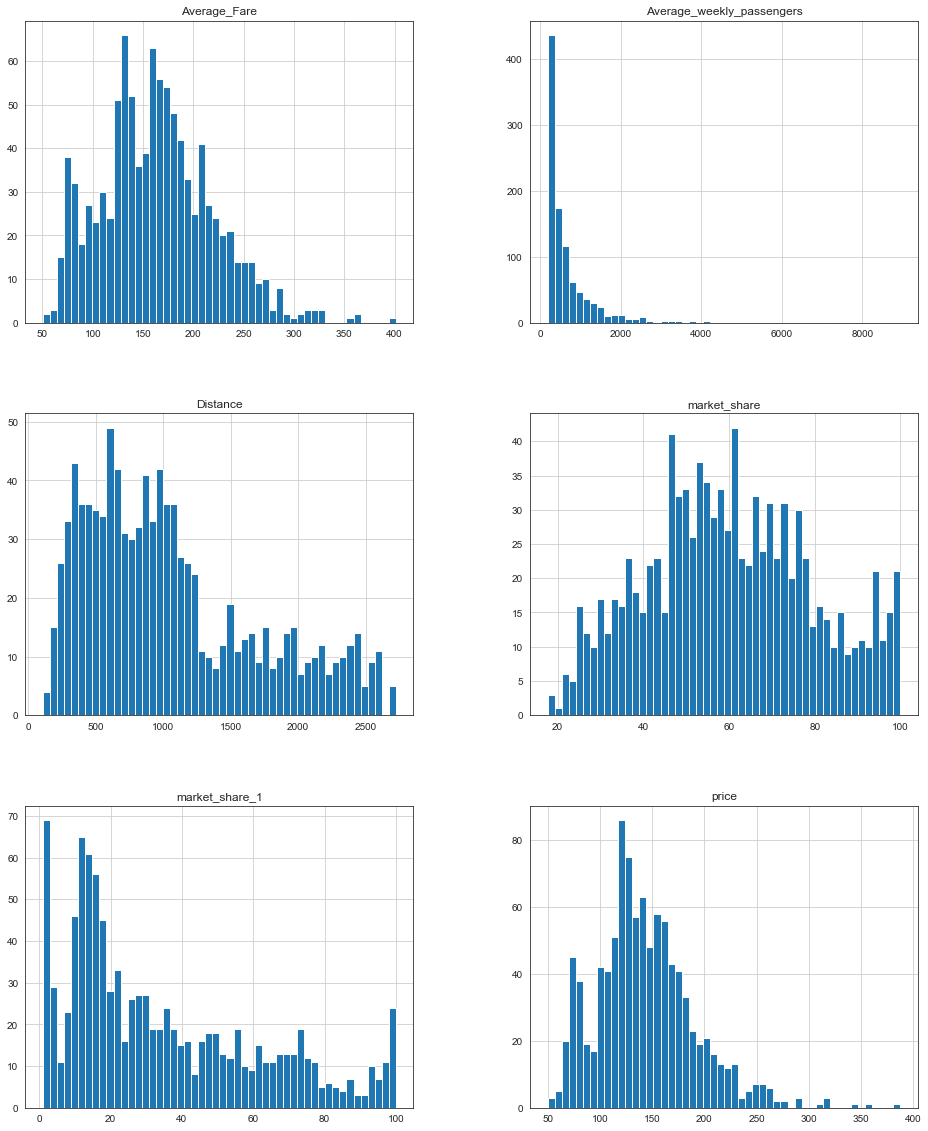

In [185]:
data_numerical.hist(figsize=(16, 20), bins=50)

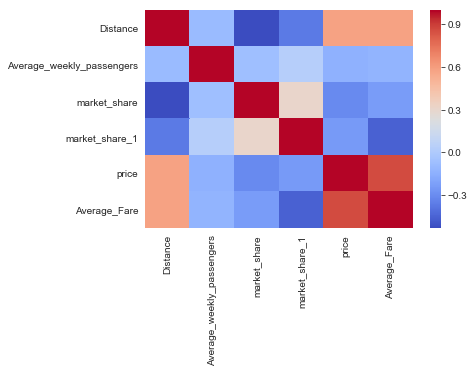

In [186]:
# Correlation  among the features
sns.heatmap(data_numerical.corr(), cmap='coolwarm')

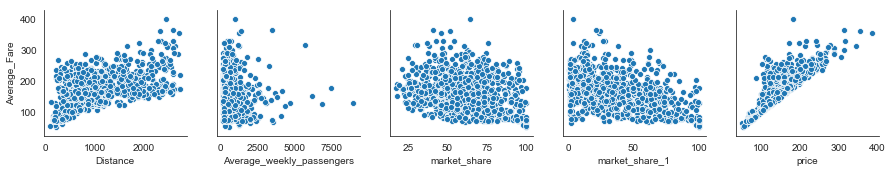

In [187]:
for i in range(0, len(data_numerical.columns), 6):
    sns.pairplot(data=data_numerical,x_vars=data_numerical.columns[i:i+5],y_vars=['Average_Fare'])

In [188]:
# Distance, Average weekly passengers and lowprice airline are haivng relationship with the target variable

In [189]:
data_numerical.columns

Index(['Distance', 'Average_weekly_passengers', 'market_share',
       'market_share_1', 'price', 'Average_Fare'],
      dtype='object')

In [190]:
potential_Feat = ['City1', 'City2', 'Distance', 'Average_weekly_passengers','market_leading_airline', 
                  'market_share', 'Low_price_airline','market_share_1', 'price']

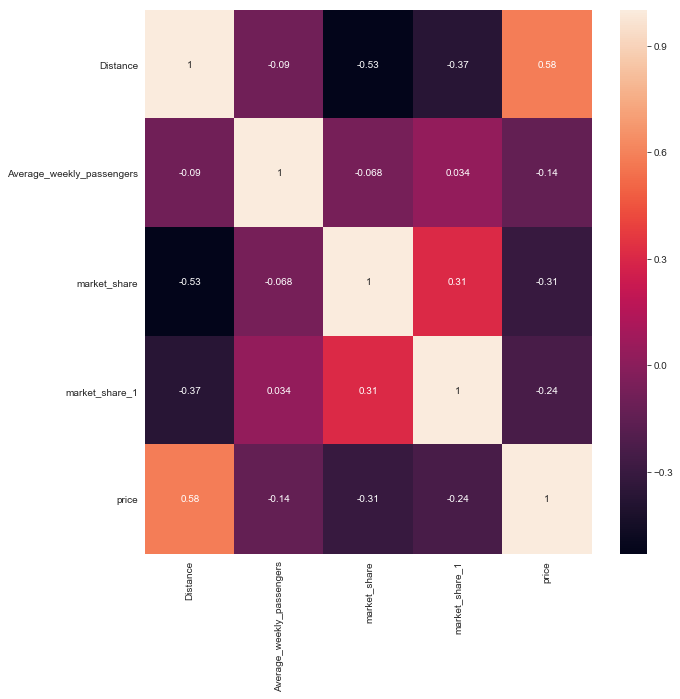

In [191]:
corr = data_numerical.drop('Average_Fare', axis=1).corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr,annot=True)

In [192]:
# the correlation between distance and price is highest 0.58. Followed by distance and market_share is -0.53
# the market_share and price has low correlation of -0.31.

In [193]:
data_corr = data_numerical.corr()['Average_Fare'][:-1]
HighCorr_features_list = data_corr[abs(data_corr) > 0.5].sort_values(ascending=False)

In [194]:
# quantitative data exploration:

In [196]:
#Let's now examine the quantitative features of our dataframe and how they relate to the average_fare which is also quantitative 

In [197]:
quantitative_features = ['Distance', 'Average_weekly_passengers', 'market_share', 'market_share_1', 'price', 'Average_Fare']
quantitative_df = data[quantitative_features]
quantitative_df.head()

,Distance,Average_weekly_passengers,market_share,market_share_1,price,Average_Fare
0,528.0,424.56,70.19,70.19,111.03,114.47
1,860.0,276.84,75.10,17.23,118.94,122.47
2,852.0,215.76,78.89,2.77,167.12,214.42
3,288.0,606.84,96.97,96.97,68.86,69.40
4,723.0,313.04,39.79,15.34,145.42,158.13


In [198]:
features_to_analyse = [x for x in quantitative_features if x in HighCorr_features_list]
features_to_analyse.append('Average_Fare')
features_to_analyse

['Distance', 'price', 'Average_Fare']

C:\Users\Satish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


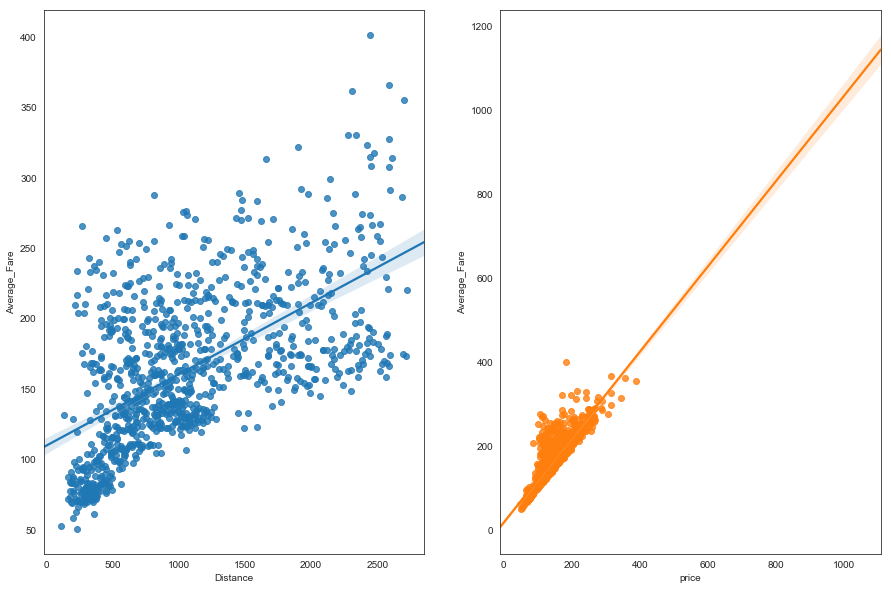

In [199]:
fig, axes = plt.subplots(round(len(features_to_analyse) / 3), 2, figsize = (15, 10))
for i, axes in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='Average_Fare', data=data[features_to_analyse], ax=axes)

In [200]:
# Categorical feature exploration:

In [201]:
data1_Categorical = data.select_dtypes(include = ['object'])
data1_Categorical.head()

,City1,City2,market_leading_airline,Low_price_airline
0,CAK,ATL,FL,FL
1,CAK,MCO,FL,DL
2,ALB,ATL,DL,CO
3,ALB,BWI,WN,WN
4,ALB,ORD,UA,WN


In [202]:
x_df=data.groupby(['City1', 'Average_Fare'], as_index = False).count().sort_values(by = 'Average_Fare',ascending = False)
x_df.head()

,City1,Average_Fare,City2,Distance,Average_weekly_passengers,market_leading_airline,market_share,Low_price_airline,market_share_1,price
967,SFO,401.23,1,1,1,1,1,1,1,1
673,LGA,365.93,1,1,1,1,1,1,1,1
645,LAX,361.57,1,1,1,1,1,1,1,1
195,BOS,355.15,1,1,1,1,1,1,1,1
644,LAX,330.28,1,1,1,1,1,1,1,1


C:\Users\Satish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


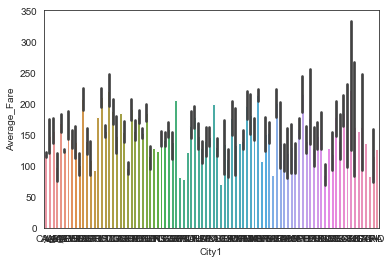

In [203]:
sns.barplot('City1', 'Average_Fare', data=np.round(data,3))
plt.show()

C:\Users\Satish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


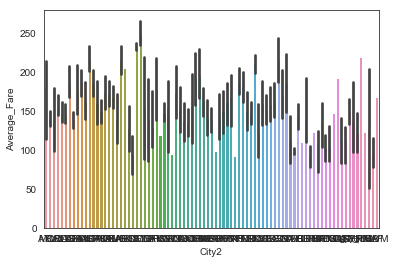

In [204]:
sns.barplot('City2', 'Average_Fare', data=np.round(data,3))
plt.show()

C:\Users\Satish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


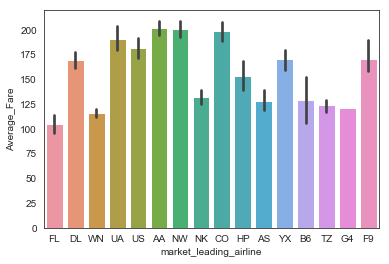

In [205]:
sns.barplot('market_leading_airline', 'Average_Fare', data=np.round(data,3))
plt.show()

C:\Users\Satish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


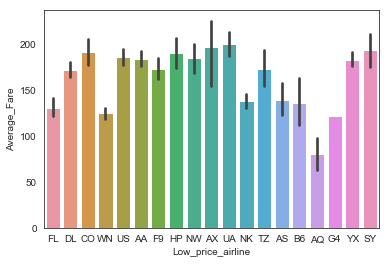

In [206]:
sns.barplot('Low_price_airline', 'Average_Fare', data=np.round(data,3))
plt.show()

In [207]:
# Categorical variables have too many variables for City1 and City2

# Checking for outliers

C:\Users\Satish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


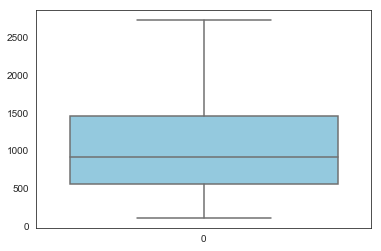

In [208]:
sns.boxplot(data=data.ix[:,2], color="skyblue")

In [209]:
data.head()

,City1,City2,Distance,Average_weekly_passengers,market_leading_airline,market_share,Low_price_airline,market_share_1,price,Average_Fare
0,CAK,ATL,528.0,424.56,FL,70.19,FL,70.19,111.03,114.47
1,CAK,MCO,860.0,276.84,FL,75.10,DL,17.23,118.94,122.47
2,ALB,ATL,852.0,215.76,DL,78.89,CO,2.77,167.12,214.42
3,ALB,BWI,288.0,606.84,WN,96.97,WN,96.97,68.86,69.40
4,ALB,ORD,723.0,313.04,UA,39.79,WN,15.34,145.42,158.13


In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
City1                        1000 non-null object
City2                        1000 non-null object
Distance                     1000 non-null float64
Average_weekly_passengers    1000 non-null float64
market_leading_airline       1000 non-null object
market_share                 1000 non-null float64
Low_price_airline            1000 non-null object
market_share_1               1000 non-null float64
price                        1000 non-null float64
Average_Fare                 1000 non-null float64
dtypes: float64(6), object(4)
memory usage: 125.9+ KB


C:\Users\Satish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


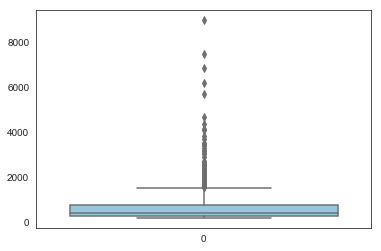

In [211]:
sns.boxplot(data=data.ix[:,3], color="skyblue")

In [212]:
# huge no. of outliers

C:\Users\Satish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


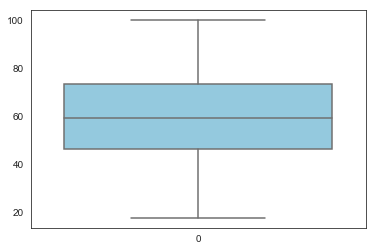

In [213]:
sns.boxplot(data=data.ix[:,5], color="skyblue")

C:\Users\Satish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


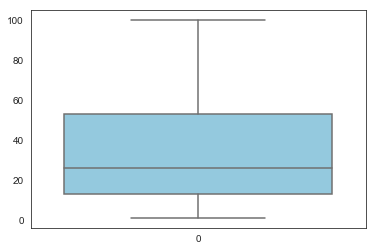

In [214]:
sns.boxplot(data=data.ix[:,7], color="skyblue")

C:\Users\Satish\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


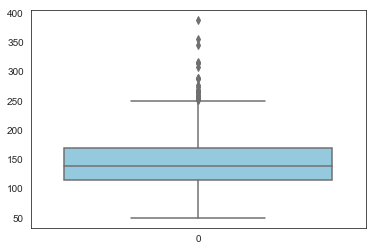

In [215]:
# library & dataset
import seaborn as sns
 
sns.boxplot(data=data.ix[:,8], color="skyblue")  ##Price
#sns.plt.show()

In [216]:
#outlier treatment -  clubbing beyond P1 and P99 percentiles

In [217]:
# outlier treatment for numerical variables
dis = data_numerical['Distance'].values  #series to array 
p1_dis = np.percentile(dis, 1) #percentile values
p2_dis = np.percentile(dis, 99)
print(p1_dis, p2_dis)

187.95 2586.01


In [218]:
# outlier treatment for numerical variables
awp = data_numerical['Average_weekly_passengers'].values  #series to array 
p1_awp = np.percentile(awp, 1) #percentile values
p2_awp = np.percentile(awp, 99)
print(p1_awp, p2_awp)

184.33679999999998 3699.3012999999996


In [219]:
# outlier treatment for numerical variables
ms = data_numerical['market_share'].values  #series to array 
p1_ms = np.percentile(ms, 1) #percentile values
p2_ms = np.percentile(ms, 99)
print(p1_ms, p2_ms)

22.9443 99.6801


In [220]:
# outlier treatment for numerical variables
ms1 = data_numerical['market_share_1'].values  #series to array 
p1_ms1 = np.percentile(ms1, 1) #percentile values
p2_ms1 = np.percentile(ms1, 99)
print(p1_ms1, p2_ms1)

1.3099 99.6801


In [221]:
data_new = [data]

for dataset1 in data_new:
    dataset1.loc[dataset1.Distance < 187.95, 'Distance' ] = 187.95
    dataset1.loc[dataset1.Distance > 2586.01, 'Distance' ] = 2586.01
    
    dataset1.loc[dataset1.Average_weekly_passengers < 184.33, 'Average_weekly_passengers' ] = 184.33
    dataset1.loc[dataset1.Average_weekly_passengers > 3699.30, 'Average_weekly_passengers' ] = 3699.30
    
    dataset1.loc[dataset1.market_share < 22.9443, 'market_share' ] = 22.9443 
    dataset1.loc[dataset1.market_share > 99.6801, 'market_share' ] = 99.6801
    
    dataset1.loc[dataset1.market_share_1 < 1.3099, 'market_share_1' ] = 1.3099
    dataset1.loc[dataset1.market_share_1 > 99.6801, 'market_share_1' ] = 99.6801

# Categorical data - dummy treatment

In [222]:
df_cat = data
df_cat.head()

,City1,City2,Distance,Average_weekly_passengers,market_leading_airline,market_share,Low_price_airline,market_share_1,price,Average_Fare
0,CAK,ATL,528.0,424.56,FL,70.19,FL,70.19,111.03,114.47
1,CAK,MCO,860.0,276.84,FL,75.10,DL,17.23,118.94,122.47
2,ALB,ATL,852.0,215.76,DL,78.89,CO,2.77,167.12,214.42
3,ALB,BWI,288.0,606.84,WN,96.97,WN,96.97,68.86,69.40
4,ALB,ORD,723.0,313.04,UA,39.79,WN,15.34,145.42,158.13


In [223]:
City1_dummies = pd.get_dummies(df_cat.City1,prefix='C1',drop_first=True)
City1_dummies.head()

,C1_ACY,C1_ALB,C1_AMA,C1_ATL,C1_AUS,C1_BDL,C1_BHM,C1_BNA,C1_BOI,C1_BOS,...,C1_SFO,C1_SJC,C1_SLC,C1_SMF,C1_SNA,C1_STL,C1_SYR,C1_TLH,C1_TPA,C1_TYS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [224]:
City2_dummies = pd.get_dummies(df_cat.City2,prefix='C2',drop_first=True)
City2_dummies.head()

,C2_AUS,C2_BDL,C2_BHM,C2_BNA,C2_BOS,C2_BUF,C2_BWI,C2_CLE,C2_CLT,C2_CMH,...,C2_SLC,C2_SMF,C2_SNA,C2_SRQ,C2_STL,C2_SYR,C2_TLH,C2_TPA,C2_TUL,C2_TUS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
#Too many columns created for City1 and City2, dropping them.

In [226]:
MLA_dummies = pd.get_dummies(df_cat.market_leading_airline,prefix='MLA',drop_first=True)
MLA_dummies.head()

,MLA_AS,MLA_B6,MLA_CO,MLA_DL,MLA_F9,MLA_FL,MLA_G4,MLA_HP,MLA_NK,MLA_NW,MLA_TZ,MLA_UA,MLA_US,MLA_WN,MLA_YX
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [227]:
LPA_dummies = pd.get_dummies(df_cat.Low_price_airline,prefix='LPA',drop_first=True)
LPA_dummies.head()

,LPA_AQ,LPA_AS,LPA_AX,LPA_B6,LPA_CO,LPA_DL,LPA_F9,LPA_FL,LPA_G4,LPA_HP,LPA_NK,LPA_NW,LPA_SY,LPA_TZ,LPA_UA,LPA_US,LPA_WN,LPA_YX
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [228]:
# final data for modelling

In [229]:
df_withDummies = pd.concat([df_cat, MLA_dummies, LPA_dummies],axis=1)
df_withDummies.head()

,City1,City2,Distance,Average_weekly_passengers,market_leading_airline,market_share,Low_price_airline,market_share_1,price,Average_Fare,...,LPA_G4,LPA_HP,LPA_NK,LPA_NW,LPA_SY,LPA_TZ,LPA_UA,LPA_US,LPA_WN,LPA_YX
0,CAK,ATL,528.0,424.56,FL,70.19,FL,70.19,111.03,114.47,...,0,0,0,0,0,0,0,0,0,0
1,CAK,MCO,860.0,276.84,FL,75.10,DL,17.23,118.94,122.47,...,0,0,0,0,0,0,0,0,0,0
2,ALB,ATL,852.0,215.76,DL,78.89,CO,2.77,167.12,214.42,...,0,0,0,0,0,0,0,0,0,0
3,ALB,BWI,288.0,606.84,WN,96.97,WN,96.97,68.86,69.40,...,0,0,0,0,0,0,0,0,1,0
4,ALB,ORD,723.0,313.04,UA,39.79,WN,15.34,145.42,158.13,...,0,0,0,0,0,0,0,0,1,0


In [230]:
final_df = df_withDummies.drop(['City1', 'City2', 'market_leading_airline', 'Low_price_airline'], axis = 1)
final_df.head()

,Distance,Average_weekly_passengers,market_share,market_share_1,price,Average_Fare,MLA_AS,MLA_B6,MLA_CO,MLA_DL,...,LPA_G4,LPA_HP,LPA_NK,LPA_NW,LPA_SY,LPA_TZ,LPA_UA,LPA_US,LPA_WN,LPA_YX
0,528.0,424.56,70.19,70.19,111.03,114.47,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,860.0,276.84,75.10,17.23,118.94,122.47,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,852.0,215.76,78.89,2.77,167.12,214.42,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,288.0,606.84,96.97,96.97,68.86,69.40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,723.0,313.04,39.79,15.34,145.42,158.13,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Cross validation 

In [231]:
df_train, df_test = cv.train_test_split(final_df,test_size=0.30,random_state=1234)

In [232]:
df_train.shape, df_test.shape

((700, 39), (300, 39))

In [233]:
X_train = df_train.iloc[:,list(range(5)) + list(range(6,df_train.shape[1]))].as_matrix()
y_train = df_train['Average_Fare']

C:\Users\Satish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [234]:
X_test = df_test.iloc[:,list(range(5)) + list(range(6,df_test.shape[1]))].as_matrix()
y_test = df_test['Average_Fare']

C:\Users\Satish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [235]:
X_train.shape,y_train.shape

((700, 38), (700,))

In [236]:
X_test.shape,y_test.shape

((300, 38), (300,))

# linear regression model

In [237]:
#Linear regression 
lr = linear_model.LinearRegression(normalize=True)
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [238]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [239]:
# Train score
lr.score(X_train,y_train)

0.8737640723484686

In [240]:
# Test score
lr.score(X_test,y_test)

0.8568472244187118

In [241]:
# Predicted values
predictedValues = lr.predict(X_test)
predictedValues

array([179.66795422, 138.74221185, 182.06159726, 165.95745865,
       151.5433549 , 186.92640612,  82.65408742, 141.22010353,
       170.99919219, 174.90224259, 178.9352868 , 229.54486188,
       188.0586903 , 104.75029814, 140.32693639, 166.50649302,
       132.11945789, 123.82882589, 188.95099198, 114.75344002,
       138.2862837 , 128.7029307 , 131.9526589 , 133.42372744,
       166.01798626, 171.57885538, 156.48658137, 175.41631515,
       179.65283523, 219.48100538, 245.20447407, 136.85972446,
       238.49080043, 105.21592491, 126.02050362, 225.41967175,
       126.45414205, 199.16134922, 206.61450605, 236.33349165,
       108.5910528 , 183.55867642, 186.11012896, 163.44800116,
       135.87841234, 155.60771239, 164.20243264, 166.56809947,
       247.79960805, 116.11564423, 162.39353934, 204.15054154,
       130.40454684, 136.51389069, 148.28065942,  81.40083206,
       219.47606258,  78.43786888, 256.3223398 , 255.47573027,
       130.33269092, 149.40188364, 215.86266321, 128.48

# Statistical Parameters for model performance check !

In [242]:
from scipy import stats

In [243]:
#adjusted R square
def AdjustedRSquare(model,X,Y):
    YHat = model.predict(X)
    n,k = X.shape
    sse = np.sum(np.square(YHat-Y),axis=0)
    sst = np.sum(np.square(Y-np.mean(Y)),axis=0)
    R2 = 1- sse/sst
    adjR2 = R2-(1-R2)*(float(k)/(n-k-1))
    return adjR2, R2

In [244]:
def ReturnPValue(model,X,Y):
    YHat = model.predict(X)
    n,k = X.shape
    sse = np.sum(np.square(YHat-Y),axis=0)
    x = np.hstack((np.ones((n,1)),np.matrix(X)))
    df = float(n-k-1)
    sampleVar = sse/df
    sampleVarianceX = x.T*x
    covarianceMatrix = linalg.sqrtm(sampleVar*sampleVarianceX.I)
    se = covarianceMatrix.diagonal()[1:]
    betasTstat = np.zeros(len(se))
    for i in range(len(se)):
        betasTstat[i] = model.coef_[i]/se[i]
    betasPvalue = 1- stats.t.cdf(abs(betasTstat),df)
    return betasPvalue

In [245]:
lr.adjR2, lr.R2 = AdjustedRSquare(lr,X_train,y_train)
print (lr.adjR2, lr.R2)

0.8665069388374879 0.8737640723484685


In [246]:
np.round(lr.coef_,1)

array([  0. ,   0. ,   0.5,  -0.4,   0.8, -19.5, -22.6,   0.2,  -1.3,
        12.2, -10.2,   0. , -11.4, -13. ,  13.8, -27.7,   2.8,  -7.5,
       -19.3,   0.4,   1.4,  10.3,  37.7,  22. ,  20.3,   7.6,   7.7,
        -2.2,  -0. ,   4.4,   4.3,  12.9,  24.3,  31.3,  11.9,  15.4,
        10.5,  -1.6])

In [247]:
%matplotlib inline
from __future__ import print_function
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [248]:
pred = lr.predict(X_test)
pred

array([179.66795422, 138.74221185, 182.06159726, 165.95745865,
       151.5433549 , 186.92640612,  82.65408742, 141.22010353,
       170.99919219, 174.90224259, 178.9352868 , 229.54486188,
       188.0586903 , 104.75029814, 140.32693639, 166.50649302,
       132.11945789, 123.82882589, 188.95099198, 114.75344002,
       138.2862837 , 128.7029307 , 131.9526589 , 133.42372744,
       166.01798626, 171.57885538, 156.48658137, 175.41631515,
       179.65283523, 219.48100538, 245.20447407, 136.85972446,
       238.49080043, 105.21592491, 126.02050362, 225.41967175,
       126.45414205, 199.16134922, 206.61450605, 236.33349165,
       108.5910528 , 183.55867642, 186.11012896, 163.44800116,
       135.87841234, 155.60771239, 164.20243264, 166.56809947,
       247.79960805, 116.11564423, 162.39353934, 204.15054154,
       130.40454684, 136.51389069, 148.28065942,  81.40083206,
       219.47606258,  78.43786888, 256.3223398 , 255.47573027,
       130.33269092, 149.40188364, 215.86266321, 128.48

# Model enhancement - L1 Regularisation

In [249]:
from sklearn.linear_model import Lasso

In [250]:
def ErrorMetric(model,X,Y):
    Yhat = model.predict(X)
    MAPE = np.mean(abs(Y-Yhat)/Y)*100
    MSSE = np.mean(np.square(Y-Yhat))
    return MAPE, MSSE

In [251]:
lasso_model = Lasso(alpha=0.9) # to make coeff zero and not near to zero

In [252]:
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [253]:
print (lasso_model.coef_)

[ 1.09014383e-02  1.28605090e-03  4.40672116e-01 -5.30851016e-01
  8.75254480e-01 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  8.07257852e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -9.12465299e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00]


In [254]:
lasso_model.coef_[((lasso_model.coef_)!=0)] # refit the model with these features !

array([ 1.09014383e-02,  1.28605090e-03,  4.40672116e-01, -5.30851016e-01,
        8.75254480e-01,  8.07257852e+00, -9.12465299e+00])

In [255]:
lassoMod = Lasso(alpha=1)
lassoMod.fit(X_train,y_train)
print (lassoMod.coef_)

[ 1.08084856e-02  1.26848354e-03  4.41079217e-01 -5.35609895e-01
  8.78103434e-01 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  6.78145836e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -8.57468030e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00]


In [256]:
lassoMod.coef_[((lassoMod.coef_)!=0)]

array([ 1.08084856e-02,  1.26848354e-03,  4.41079217e-01, -5.35609895e-01,
        8.78103434e-01,  6.78145836e+00, -8.57468030e+00])

In [257]:
lassoMod.MAPE, lassoMod.MSSE = ErrorMetric(lassoMod, X_train, y_train)

In [258]:
print (lassoMod.MAPE, lassoMod.MSSE)

8.881224693747106 492.1708018856924


# Comaprison to stronger models: Random Forest, XGB Regression

# 1. Linear regression Model

In [259]:
# Rsquare, MSE, MAE for Linear regression

In [260]:
pred = lr.predict(X_test)
print('Liner Regression R squared: %.4f' % lr.score(X_test, y_test))

Liner Regression R squared: 0.8568


In [261]:
lr_mse = mean_squared_error(pred, y_test)
lr_rmse = np.sqrt(lr_mse)
print('Liner Regression RMSE: %.4f' % lr_rmse)

Liner Regression RMSE: 19.6946


In [262]:
from sklearn.metrics import mean_absolute_error
lr_mae = mean_absolute_error(pred, y_test)
print('Linear Regression MAE: %.4f' % lr_mae)

Linear Regression MAE: 14.1763


# 2. Random Forest regressor

In [263]:
from sklearn.ensemble import RandomForestRegressor

RF_reg = RandomForestRegressor(random_state=42)
RF_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [264]:
# Rsquare, MSE, MAE for RF regressor

In [265]:
print('Random Forest R squared": %.4f' % RF_reg.score(X_test, y_test))

Random Forest R squared": 0.8606


In [266]:
rf_pred = RF_reg.predict(X_test)
forest_mse = mean_squared_error(rf_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 19.4330


In [267]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(rf_pred, y_test)
print('Random Forest MAE: %.4f' % lin_mae)

Random Forest MAE: 12.7978


# Gradient boosting regressor

In [268]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [269]:
# Rsquare, MSE, MAE for XGB regressor

In [270]:
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))

Gradient Boosting R squared": 0.8774


In [271]:
b_pred = model.predict(X_test)
model_mse = mean_squared_error(b_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 18.2296


In [272]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(b_pred, y_test)
print('Gradient Boosting MAE: %.4f' % lin_mae)

Gradient Boosting MAE: 12.3552


# Variable importance/ Important Features 

In [273]:
#Feature Importance

In [274]:
feature_labels = np.array(['Distance',
'Average_weekly_passengers',
'market_share',
'market_share_1',
'price',
'Average_Fare',
'MLA_AS',
'MLA_B6',
'MLA_CO',
'MLA_DL',
'MLA_F9',
'MLA_FL',
'MLA_G4',
'MLA_HP',
'MLA_NK',
'MLA_NW',
'MLA_TZ',
'MLA_UA',
'MLA_US',
'MLA_WN',
'MLA_YX',
'LPA_AQ',
'LPA_AS',
'LPA_AX',
'LPA_B6',
'LPA_CO',
'LPA_DL',
'LPA_F9',
'LPA_FL',
'LPA_G4',
'LPA_HP',
'LPA_NK',
'LPA_NW',
'LPA_SY',
'LPA_TZ',
'LPA_UA',
'LPA_US',
'LPA_WN',
'LPA_YX'])


In [275]:
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

LPA_WN-0.00%
LPA_FL-0.00%
LPA_TZ-0.00%
LPA_AQ-0.00%
MLA_YX-0.00%
MLA_AS-0.00%
LPA_HP-0.00%
MLA_HP-0.00%
MLA_FL-0.00%
LPA_US-0.03%
LPA_NK-0.12%
MLA_UA-0.15%
LPA_AS-0.17%
LPA_UA-0.19%
LPA_B6-0.19%
LPA_G4-0.23%
MLA_CO-0.29%
MLA_F9-0.36%
LPA_NW-0.42%
LPA_DL-0.48%
MLA_DL-0.56%
LPA_AX-0.61%
MLA_WN-0.75%
MLA_NW-0.87%
LPA_CO-1.19%
Average_Fare-1.20%
MLA_TZ-1.21%
MLA_G4-1.36%
LPA_F9-1.49%
MLA_NK-1.76%
MLA_B6-1.87%
LPA_SY-2.04%
MLA_US-3.82%
Average_weekly_passengers-4.08%
market_share-10.33%
Distance-13.00%
price-24.81%
market_share_1-26.43%


In [276]:
#The most important features are Price, Distance, Market_shares and MLA_US (market lower price & US code)
#And the least important feature is Apartment, which means that regardless of whether this unit is an apartment or not, 
#does not matter to the sold price. Overall, most of these 19 features are used.

In [277]:
importance

array([0.12996564, 0.04076888, 0.10328112, 0.26426488, 0.24809392,
       0.0119848 , 0.        , 0.01874935, 0.00289076, 0.00556616,
       0.00355797, 0.        , 0.01356865, 0.        , 0.01756145,
       0.00874875, 0.01212524, 0.00148383, 0.03823712, 0.00754494,
       0.        , 0.        , 0.00169823, 0.00607439, 0.00191325,
       0.01186915, 0.00475396, 0.0149407 , 0.        , 0.00234461,
       0.        , 0.00121008, 0.00424269, 0.02040919, 0.        ,
       0.00185519, 0.00029511, 0.        ])

In [278]:
feature_labels

array(['Distance', 'Average_weekly_passengers', 'market_share',
       'market_share_1', 'price', 'Average_Fare', 'MLA_AS', 'MLA_B6',
       'MLA_CO', 'MLA_DL', 'MLA_F9', 'MLA_FL', 'MLA_G4', 'MLA_HP',
       'MLA_NK', 'MLA_NW', 'MLA_TZ', 'MLA_UA', 'MLA_US', 'MLA_WN',
       'MLA_YX', 'LPA_AQ', 'LPA_AS', 'LPA_AX', 'LPA_B6', 'LPA_CO',
       'LPA_DL', 'LPA_F9', 'LPA_FL', 'LPA_G4', 'LPA_HP', 'LPA_NK',
       'LPA_NW', 'LPA_SY', 'LPA_TZ', 'LPA_UA', 'LPA_US', 'LPA_WN',
       'LPA_YX'], dtype='<U25')

In [279]:
s1 = pd.Series([1.28809811e-01, 4.82013503e-02, 8.81036961e-02, 2.84759031e-01,
       2.55990082e-01, 1.10108792e-02, 0.00000000e+00, 7.37830398e-03,
       4.64288154e-03, 1.65860729e-03, 4.83427434e-03, 0.00000000e+00,
       1.24629454e-02, 6.09681274e-04, 1.64789058e-02, 9.28079948e-03,
       1.07467190e-02, 2.00195959e-03, 4.05158855e-02, 5.63861750e-03,
       0.00000000e+00, 0.00000000e+00, 1.98801812e-03, 8.07985263e-03,
       1.02477211e-03, 1.17531249e-02, 3.24378774e-03, 1.33235862e-02,
       0.00000000e+00, 3.12423860e-03, 7.92884187e-04, 0.00000000e+00,
       2.50576216e-03, 2.06694764e-02, 0.00000000e+00, 8.11236818e-05,
       2.88942409e-04, 0.00000000e+00], name='variable imp')

In [280]:
s2 = pd.Series(['Distance', 'Average_weekly_passengers', 'market_share',
       'market_share_1', 'price', 'MLA_AS', 'MLA_B6',
       'MLA_CO', 'MLA_DL', 'MLA_F9', 'MLA_FL', 'MLA_G4', 'MLA_HP',
       'MLA_NK', 'MLA_NW', 'MLA_TZ', 'MLA_UA', 'MLA_US', 'MLA_WN',
       'MLA_YX', 'LPA_AQ', 'LPA_AS', 'LPA_AX', 'LPA_B6', 'LPA_CO',
       'LPA_DL', 'LPA_F9', 'LPA_FL', 'LPA_G4', 'LPA_HP', 'LPA_NK',
       'LPA_NW', 'LPA_SY', 'LPA_TZ', 'LPA_UA', 'LPA_US', 'LPA_WN',
       'LPA_YX'], name='feature')

In [281]:
imp = pd.concat([s1, s2], axis=1)
imp.head()

,variable imp,feature
0,0.128810,Distance
1,0.048201,Average_weekly_passengers
2,0.088104,market_share
3,0.284759,market_share_1
4,0.255990,price


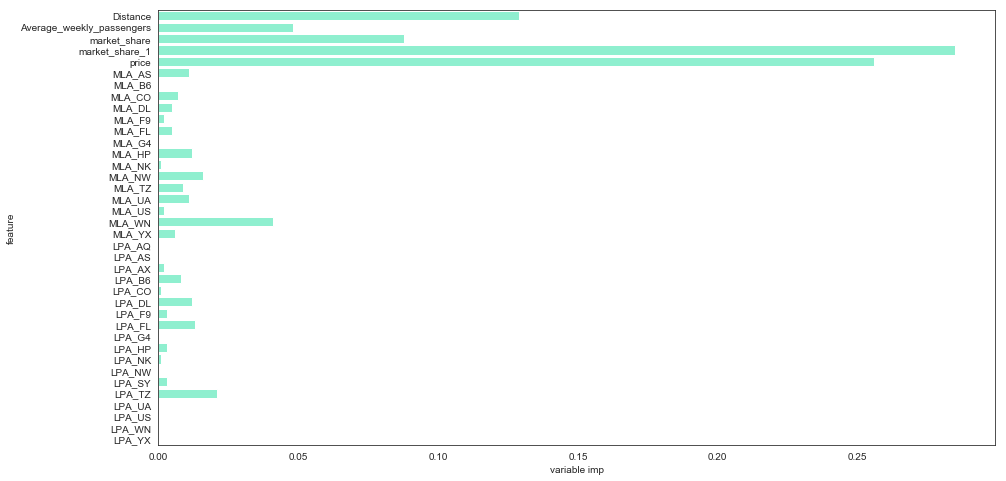

In [282]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.barplot('variable imp', 'feature', data=np.round(imp,3), color="aquamarine")

# Conclusions:

1.	Features like price, market_share, distance have similar distribution like average_fare
2.	Average_weekly_passengers, market_share_1 is strictly not normal
3.	We noticed that out of the numerical features, distance, price, market_share share some relationship with the target variable
4.	The passengers data is scattered with huge outliers, and most data is concentrated within sum of 2500. Very random, less pattern
5.	By looking at correlation between numerical values we discovered 2 features which have a strong relationship to the target variable
6.	The correlation between distance and price is highest 0.58
7.	The correlation between distance and market_share is 2nd highest -0.53
8.	Categorical variables like City1 and City2, has too many levels, so encoding is not an option for them but the categorical variables Low_price_airlin and market_leading_airline can be dummified as the no. of levels are reasonable 
9.	Any abnormality noticed in the regression graphs can be attributed to a huge no. of outliers present in the data, and  the normality in some features being low
10.	The most important features are Price, Distance, Market_shares and MLA_US (market lower price & US code) 
11.	RF and XGB has indeed reduced the RMSE and MPE errors.

## PCA

In [283]:
final_df.head()

,Distance,Average_weekly_passengers,market_share,market_share_1,price,Average_Fare,MLA_AS,MLA_B6,MLA_CO,MLA_DL,...,LPA_G4,LPA_HP,LPA_NK,LPA_NW,LPA_SY,LPA_TZ,LPA_UA,LPA_US,LPA_WN,LPA_YX
0,528.0,424.56,70.19,70.19,111.03,114.47,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,860.0,276.84,75.10,17.23,118.94,122.47,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,852.0,215.76,78.89,2.77,167.12,214.42,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,288.0,606.84,96.97,96.97,68.86,69.40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,723.0,313.04,39.79,15.34,145.42,158.13,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [284]:
features = ['Distance', 'Average_weekly_passengers', 'market_share',
       'market_share_1', 'price', 'MLA_AS', 'MLA_B6',
       'MLA_CO', 'MLA_DL', 'MLA_F9', 'MLA_FL', 'MLA_G4', 'MLA_HP',
       'MLA_NK', 'MLA_NW', 'MLA_TZ', 'MLA_UA', 'MLA_US', 'MLA_WN',
       'MLA_YX', 'LPA_AQ', 'LPA_AS', 'LPA_AX', 'LPA_B6', 'LPA_CO',
       'LPA_DL', 'LPA_F9', 'LPA_FL', 'LPA_G4', 'LPA_HP', 'LPA_NK',
       'LPA_NW', 'LPA_SY', 'LPA_TZ', 'LPA_UA', 'LPA_US', 'LPA_WN',
       'LPA_YX']

In [285]:
# Separating out the features
X= final_df.loc[:, features].values

In [286]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3'])

In [287]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.cumsum())

[454040.80571564 366232.75074311   1447.70630905]
[0.55194495 0.44520297 0.00175987]
[0.55194495 0.99714792 0.99890779]


In [288]:
principalDf.head()

,pc1,pc2,pc3
0,225.792605,-531.220837,-12.584499
1,-116.911004,-408.478128,-18.145323
2,-155.149811,-456.958209,30.331779
3,527.100713,-566.483346,-44.212400
4,5.754020,-475.647936,14.809687


In [289]:
result = principalDf

Text(0.5,0.92,'PCA on the train data')

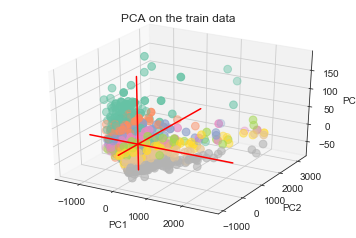

In [290]:
# Run The PCA
sns.set_style("white")

from mpl_toolkits.mplot3d import Axes3D
Axes3D = Axes3D  # pycharm auto import
final_df['Average_Fare']=pd.Categorical(final_df['Average_Fare'])
my_color=final_df['Average_Fare'].cat.codes

# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['pc1'], result['pc2'], result['pc3'], c=my_color, cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['pc1']), max(result['pc1'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['pc2']), max(result['pc2'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['pc3']), max(result['pc3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the train data")

In [291]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(x)
principalDf2 = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9'])

In [292]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.cumsum())

[4.54040806e+05 3.66232751e+05 1.44770631e+03 6.42440966e+02
 2.54638815e+02 2.29484500e-01 1.45960600e-01 1.37031072e-01
 1.08777948e-01]
[5.51944946e-01 4.45202971e-01 1.75987306e-03 7.80969551e-04
 3.09546202e-04 2.78967900e-07 1.77433866e-07 1.66578877e-07
 1.32233574e-07]
[0.55194495 0.99714792 0.99890779 0.99968876 0.99999831 0.99999859
 0.99999876 0.99999893 0.99999906]


In [293]:
principalDf2.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,225.792605,-531.220837,-12.584499,26.955319,3.631607,-0.739031,-0.159944,-0.022867,-0.288489
1,-116.911004,-408.478128,-18.145323,-18.898903,-13.443085,-0.312115,0.479595,-0.614868,-0.124477
2,-155.149811,-456.958209,30.331779,-30.860147,-19.260528,-0.267969,0.300717,0.717672,-0.173072
3,527.100713,-566.483346,-44.212400,52.010539,-15.896558,0.359930,0.034228,0.078687,-0.043612
4,5.754020,-475.647936,14.809687,-27.381556,22.812442,0.560287,-0.414182,0.200647,-0.567006


C:\Users\Satish\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011738390>,
      dtype=object)

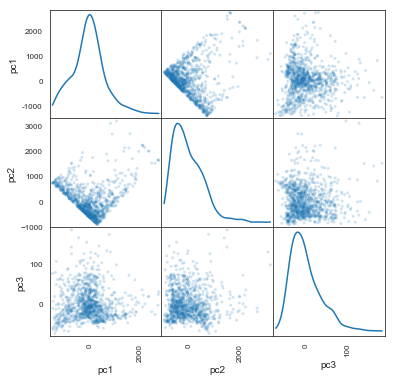

In [294]:
import numpy as np 
import pandas as pd
from pandas.tools.plotting import scatter_matrix

#now plot using pandas 
scatter_matrix(principalDf, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [295]:
from sklearn.cross_validation import train_test_split
#Join 'default' in to the train_pDf dataframe
train_principalDf_xy = pd.concat([principalDf2, final_df['Average_Fare']], axis = 1) 

train_principalDf_xy_1 = train_principalDf_xy

#train_principal_DF_xy_1 is the final transformed train data set

X = train_principalDf_xy_1[['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9']] 
Y = train_principalDf_xy_1['Average_Fare']

In [296]:
X.shape

(1000, 9)

In [297]:
Y.shape

(1000,)

In [298]:
from sklearn import cross_validation as cv

In [299]:
Xtrain, Xtest, Ytrain, Ytest = cv.train_test_split(X,Y,test_size = 0.30, random_state = 34)
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((700, 9), (300, 9), (700,), (300,))

In [300]:
# Linear regression
lr_pca = linear_model.LinearRegression(normalize=True)
lr_pca.fit(Xtrain,Ytrain)
print('Coefficients: \n', np.round(lr_pca.coef_,1))
print(lr_pca.score(Xtrain,Ytrain))
print(lr_pca.score(Xtest,Ytest))    

Coefficients: 
 [ -0.    0.    0.9  -0.5  -0.6  -8.8 -14.3   0.6  -2. ]
0.8519151382594896
0.831692631019467


In [301]:
X = train_principalDf_xy_1[['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9']] 
Y = train_principalDf_xy_1['Average_Fare']

In [302]:
n_folds = 5
y_train1 = final_df.values

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(Y)
    rmse= np.sqrt(-cross_val_score(model, X.values, Y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [303]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [304]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [305]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [306]:
score = rmsle_cv(lasso)
print("\nLasso rmse score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet rmse score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("Gradient Boosting rmse score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_xgb)
print("Xgboost rmse score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso rmse score: 22.0005 (0.5331)

ElasticNet rmse score: 22.0005 (0.5333)

Gradient Boosting rmse score: 19.9892 (1.2209)

Xgboost rmse score: 20.2065 (1.0663)



In [307]:
GBoost.fit(Xtrain,Ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=5, subsample=1.0, verbose=0,
             warm_start=False)

In [308]:
# train Score
GBoost.score(Xtrain,Ytrain)

0.986044245264383

In [309]:
# Test score
GBoost.score(Xtest,Ytest)

0.8607649684221392

In [310]:
model_xgb.fit(Xtrain,Ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1.7817,
       missing=None, n_estimators=2200, n_jobs=1, nthread=-1,
       objective='reg:linear', random_state=7, reg_alpha=0.464,
       reg_lambda=0.8571, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5213)

In [311]:
# Train Score
model_xgb.score(Xtrain,Ytrain)

0.9993180440254102

In [312]:
# test score
model_xgb.score(Xtest,Ytest)

0.8578937335215042

In [313]:
# Predicted values
y_pred_xgb = model_xgb.predict(Xtest)
y_pred_xgb

array([218.36711 , 261.94403 , 194.99948 , 187.65404 , 172.01349 ,
       136.67308 , 172.15959 ,  81.33903 , 161.31287 , 191.13818 ,
       249.44173 , 153.22661 , 116.96262 , 144.9842  , 214.78908 ,
       200.7684  , 207.5843  , 166.4841  , 145.97325 , 179.07846 ,
       124.986435, 120.13327 , 163.19653 , 190.00398 , 215.37883 ,
       216.95636 ,  87.20201 , 213.59886 , 178.91418 , 240.36931 ,
       200.00116 ,  91.362305, 127.384926, 271.3947  , 229.32828 ,
       271.6864  , 135.18369 , 170.78429 , 170.35123 , 138.98071 ,
       174.7133  ,  81.50713 , 211.32608 , 158.66953 ,  82.774284,
       168.99234 , 271.98306 , 186.80954 , 253.1742  ,  89.28079 ,
       135.93968 , 273.1878  , 195.52264 , 125.928635, 185.97583 ,
        77.11066 , 192.85744 , 169.32843 , 158.89433 , 108.95379 ,
        75.98324 , 187.9576  ,  74.53295 , 174.03699 , 134.9864  ,
       150.10632 , 126.19315 , 149.33751 , 162.09274 , 115.47828 ,
        80.839714, 112.65809 , 181.23923 , 158.45569 ,  84.132